In [2]:
import pandas as pd
import numpy as np
import random as rnd
from itertools import cycle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Проверим размерность тренировочного сета, а так же какие столбцы имеем.

In [4]:
display(train.head(5))
print(train.shape)
print(train.columns.values)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [15]:
 """
    Plot the missing values of df.

    Parameters
    ----------
    df : pandas DataFrame
    ax : matplotlib axes
        if None then a new figure and axes will be created
    colors : dict
        dict with {True: c1, False: c2} where the values are
        matplotlib colors.
    aspect : int
        the width to height ratio for each rectangle.
    title : str
    kwargs : dict
        matplotlib.axes.bar kwargs

    Returns
    -------
    ax : matplotlib axes

    """

def missmap(df, ax=None, colors=None, aspect=4,
            title=None, **kwargs):

    if ax is None:
        fig, ax = plt.subplots()

    # setup the axes
    dfn = pd.isnull(df)

    ny = len(df)
    nx = len(df.columns)
    # each column is a stacked bar made up of ny patches.
    xgrid = np.tile(np.arange(len(df.columns)), (ny, 1)).T
    ygrid = np.tile(np.arange(ny), (nx, 1))
    # xys is the lower left corner of each patch
    xys = (zip(x, y) for x, y in zip(xgrid, ygrid))

    if colors is None:
        colors = {True: '#EAF205', False: 'k'}

    widths = cycle([aspect])
    heights = cycle([1])

    for xy, width, height, col in zip(xys, widths, heights, dfn.columns):
        color_array = dfn[col].map(colors)

        rects = [Rectangle(xyc, width, height, **kwargs)
                 for xyc, c in zip(xy, color_array)]

        p_coll = collections.PatchCollection(rects, color=color_array,
                                             edgecolor=color_array, **kwargs)
        ax.add_collection(p_coll, autolim=False)

    # post plot aesthetics
    ax.set_xlim(0, nx)
    ax.set_ylim(0, ny)

    ax.set_xticks(.5 + np.arange(nx))  # center the ticks
    ax.set_xticklabels(dfn.columns)
    for t in ax.get_xticklabels():
        t.set_rotation(90)

    # remove tick lines
    ax.tick_params(axis='both', which='both', bottom='off', left='off',
                   labelleft='off')
    ax.grid(False)

    if title:
        ax.set_title(title)
    return ax


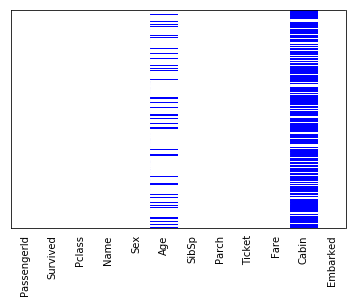

In [20]:
missmap(train, colors = {True: 'blue', False: 'white'})
plt.show()

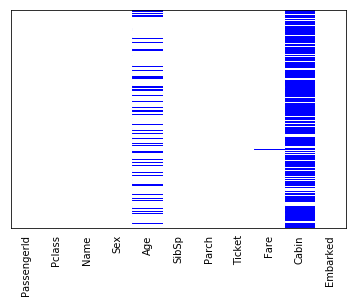

In [21]:
missmap(test, colors = {True: 'blue', False: 'white'})
plt.show()

Вытащим отдельным массивом id пассажиров, это потребуется нам в самом конце, чтобы получить ответ. 

In [7]:
ids = test.iloc[:,0]


In [8]:
train[train.Age.isna()].Survived.value_counts()

0    125
1     52
Name: Survived, dtype: int64

In [9]:
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Moran, Mr. James",male,347082,G6,S
freq,1,577,7,4,644


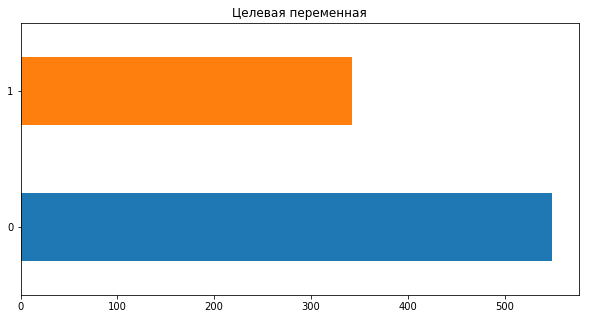

In [10]:
plt.figure(figsize=(10,5))
train['Survived'].value_counts().plot(kind='barh')
plt.title('Целевая переменная')
plt.show()

Младенцы имеют высокую выживаемост, а люди старше 80 лет выжили все. 

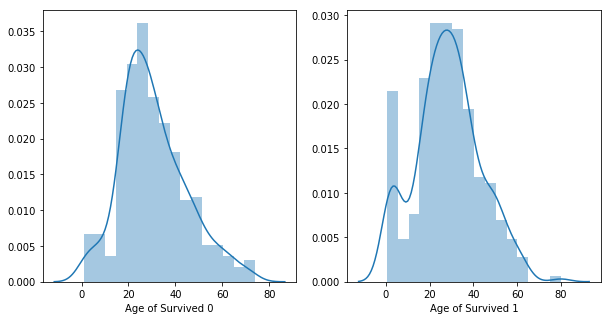

In [423]:
plt, axes = plt.subplots(1, 2, figsize=(10, 5))

for ax, i in zip(axes.flatten(), range(0, 2)):
    sns.distplot(train[train['Survived'] == i]['Age'].dropna(), ax=ax, axlabel='Age of Survived ' + str(i))

Выживаемость первого класса выше чем третьего. 

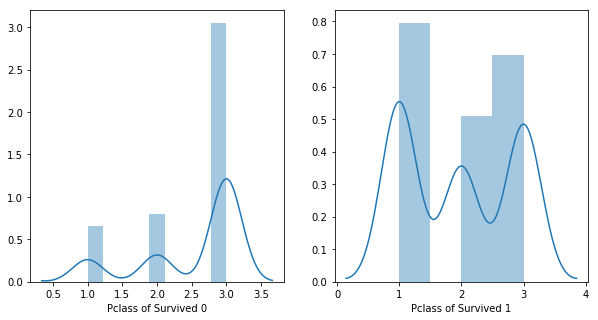

In [7]:
plt, axes = plt.subplots(1, 2, figsize=(10, 5))

for ax, j in zip(axes.flatten(), range(0, 2)):
    sns.distplot(train[train['Survived'] == j]['Pclass'].dropna(), ax=ax, axlabel='Pclass of Survived ' + str(j))

In [11]:
print('Размерность набора данных до удаления: {}'.format(train.shape))

train.drop(columns=['Ticket'], inplace=True)
test.drop(columns=['Ticket'], inplace=True)

print('Размерность набора данных после удаления: {}'.format(train.shape))

Размерность набора данных до удаления: (891, 12)
Размерность набора данных после удаления: (891, 11)


Посмотрим в каких каютах сколько человек

In [12]:
test[test['Cabin'].isnull()==True].shape[0]
test["Cabin"].value_counts()
train[train['Cabin'].isnull()==True].shape[0]
train["Cabin"].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
F2             3
E101           3
C22 C26        3
F33            3
E8             2
F4             2
C93            2
B20            2
C123           2
B18            2
E44            2
B5             2
B77            2
D36            2
B51 B53 B55    2
B22            2
B35            2
D33            2
C83            2
E24            2
C125           2
E121           2
D26            2
E67            2
C2             2
E25            2
              ..
C99            1
D15            1
B79            1
B102           1
E38            1
E36            1
C70            1
E12            1
F E69          1
A16            1
C95            1
A19            1
E17            1
E34            1
C110           1
B82 B84        1
D21            1
E49            1
B80            1
B4             1
A23            1
D49            1
C104           1
C128           1
D37            1
C103           1
D45            1
E68           

Создадим отдельный датафрейм с названиями палуб и номерами кают. А у тех кто не указал эти данные заменим средними. 

In [13]:
cabins_train = train[["Cabin"]].copy()
cabins_test = test[["Cabin"]].copy()
cabins_train["Cabin_Data"] = cabins_train["Cabin"].isnull().apply(lambda x: not x)
cabins_train["Deck"] = cabins_train["Cabin"].str.slice(0,1)
cabins_train["Room"] = cabins_train["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")

cabins_test["Cabin_Data"] = cabins_test["Cabin"].isnull().apply(lambda x: not x)
cabins_test["Deck"] = cabins_test["Cabin"].str.slice(0,1)
cabins_test["Room"] = cabins_test["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")




In [14]:
cabins_test.drop(["Cabin_Data", "Cabin"], axis = 1, inplace = True, errors = "ignore")
cabins_train.drop(["Cabin_Data", "Cabin"], axis = 1, inplace = True, errors = "ignore")

In [15]:
cabins_test["Deck"] = cabins_test["Deck"].fillna("N")
cabins_test["Room"] = cabins_test["Room"].fillna(cabins_test["Room"].mean())
cabins_train["Deck"] = cabins_train["Deck"].fillna("N")
cabins_train["Room"] = cabins_train["Room"].fillna(cabins_train["Room"].mean())

Используем OneHotEncoding и создадим матрицу категоральных признаков все из которых кроме одного равны 0. 

In [16]:
def one_hot_column(df, label, drop_col=False):
    one_hot = pd.get_dummies(df[label], prefix=label)
    if drop_col:
        df = df.drop(label, axis=1)
    df = df.join(one_hot)
    return df


def one_hot(df, labels, drop_col=False):
    for label in labels:
        df = one_hot_column(df, label, drop_col)
    return df

Как выяснилось в тестовой выборке не оказалось людей с палубы Т. Поэтому мы создадим ее руками, а затем все сложим в трейн и тест сеты. 

In [17]:
dat = [0 for x in range(418)]


In [18]:
cabins_train = one_hot(cabins_train, ["Deck"], drop_col=True)
cabins_test = one_hot(cabins_test, ["Deck"], drop_col=True)
cabins_test.insert(cabins_test.shape[1]-1, 'Deck_T', dat)

In [19]:
train = pd.concat([train, cabins_train], axis = 1)


In [20]:
test = pd.concat([test, cabins_test], axis = 1)

В именах содержатся приставки которые так же коррелируют с выживаемостью. 

In [21]:
train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).unique()

train['title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [22]:
train['title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Mme           1
Capt          1
Don           1
Countess      1
Ms            1
Sir           1
Jonkheer      1
Lady          1
Name: title, dtype: int64

Создаем дф с приставками, а редкие заключим в rare

In [23]:
for dataset in [train, test]:
    dataset['title'] = dataset['title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')

In [24]:
train[['title', 'Survived']].groupby(['title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [25]:
for dataset in [train, test]:
    dataset['title'] = dataset['title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}).fillna(0)
    

In [26]:
print('Размерность набора данных до удаления: {}'.format(train.shape))

for dataset in [train, test]:
    dataset.drop(columns=['Name', 'PassengerId'], inplace=True)
    
print('Размерность набора данных после удаления: {}'.format(train.shape))

Размерность набора данных до удаления: (891, 22)
Размерность набора данных после удаления: (891, 20)


Заменим категоральные признаки числами. А недостающие данные о возрасте медианными значениями. Так же создадим дф с размером семьи и в случае если путешественник один присвоим статус Alone. 

In [27]:
for dataset in [train, test]:
    dataset['Sex'] = dataset['Sex'].map({'male': 1, 'female': 0})

In [28]:
for dataset in [train, test]:
    dataset['Age'] =  dataset['Age'].fillna(np.median(dataset['Age'].median()))

In [29]:
for dataset in [train, test]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [30]:
for dataset in [train, test]:
    dataset['Alone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'Alone'] = 1

In [31]:
train = train.drop(['Parch', 'SibSp', 'FamilySize', 'Cabin'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize', 'Cabin'], axis=1)
print('Размерность набора данных после удаления: {}'.format(train.shape))

Размерность набора данных после удаления: (891, 18)


Так же заменим цифрами данные о городах посадки. 

In [32]:
for dataset in [train, test]:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
for dataset in [train, test]:    
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype('int')

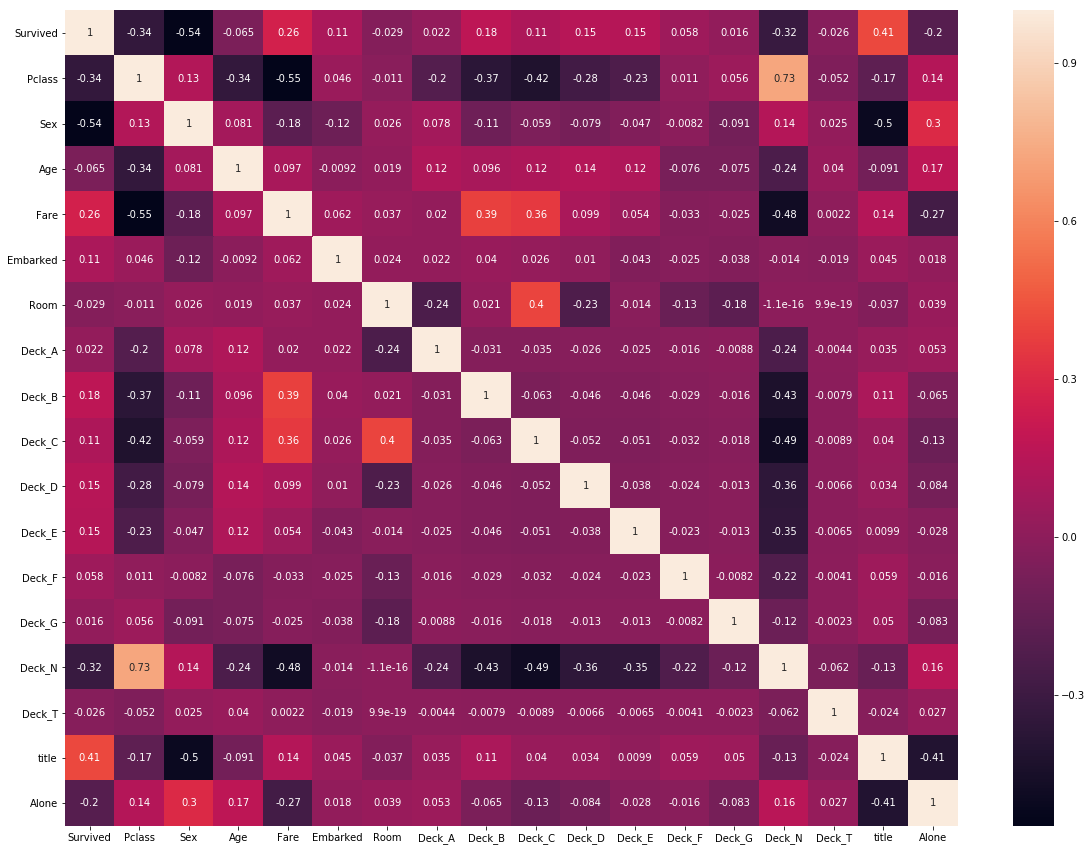

<Figure size 432x288 with 0 Axes>

In [36]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [ ]:
train2 = train.drop( axis=1)

Логистическая регрессия

In [471]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [472]:
y = train['Survived']
X = train.drop(columns=['Survived'])


In [473]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [291]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

pred = logreg.predict(X_val)
accuracy_score(y_val, pred)


0.7988826815642458

In [298]:
test = np.nan_to_num(test)
pred = logreg.predict(test)

Дерево решений

In [292]:
from sklearn.tree import DecisionTreeClassifier


In [293]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

pred = clf_tree.predict(X_val)
accuracy_score(y_val, pred)

0.7653631284916201

Случайное дерево

In [454]:
from sklearn.ensemble import RandomForestClassifier

In [481]:
rnd_frst = RandomForestClassifier()
rnd_frst.fit(X_train, y_train)

pred = rnd_frst.predict(X_val)
accuracy_score(y_val, pred)

0.8100558659217877

In [482]:
test = np.nan_to_num(test)
pred = rnd_frst.predict(test)

Метод опорных векторов

In [478]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1000,gamma=1000)
clf.fit(X_train, y_train)
pred = clf.predict(X_val)
accuracy_score(y_val, pred)

0.7988826815642458

In [479]:
test = np.nan_to_num(test)
pred = clf.predict(test)

МОР

In [460]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
clf.fit(X_train, y_train)
pred = clf.predict(X_val)
accuracy_score(y_val, pred)

0.7150837988826816

Сохраним все в файл

In [483]:
frame = pd.DataFrame(pred) 
frame.columns = ['Survived']
frame.insert(frame.shape[1]-1, 'PassengerID', ids)

frame.to_csv('pred.csv',index=False)
